In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pacientes_raw = pd.read_excel('C:/Users/Rafael Ortega/Proyectos/Data_Analyst/EDA/EDA - Rafael Ortega/src/data/raw/Datos de pacientes.xlsx')


c:\Users\Rafael Ortega\AppData\Local\Programs\Python\Python37\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [4]:
pacientes_raw.head()

,Apellido,Comentarios,Correo electronico,Direccion,DNI,Edad,Fecha de creacion del registro,Fecha Nacimiento,ID Paciente,Localidad,Nº de Afiliado,Nombres,Obra Social,Plan Obra Social,Telefono Fijo,Telefono Móvil
0,DePrueba,esposa del dr.,ivanags@hotmail.com,9 de Julio 170 - Planta Alta,27480893.0,43 años,NaT,1979-10-22 00:00:00,1,Rafaela,2.748089e+07,Ivana,IAPOS,NaN,435015,342154073978
1,Zurbriggen,NaN,NaN,Chiaraviglio 198,14338475.0,61 años,NaT,1961-06-16 00:00:00,2,Rafaela,1.433848e+07,María Cristina,OSECAC,NaN,437113,NaN
2,Zoratti,NaN,graciela_ferreteria@hotmail.com,Alvear 946,17008004.0,58 años,NaT,1964-07-24 00:00:00,3,Rafaela,1.700800e+07,Graciela,CENTRO ASISTENCIAL,NaN,NaN,15683213
3,Trossero,NaN,dtrossero@hotmail.com,NaN,29215013.0,NaN,NaT,NaN,4,Ataliva,2.921501e+07,Daniela Laura,CENTRO ASISTENCIAL,NaN,NaN,03493 15405038
4,Ingaramo,NaN,flia.vinderola@hotmail.com,Chacabuco 347,6480084.0,81 años,NaT,1941-06-13 00:00:00,5,Rafaela,6.049401e+17,Alcira,SANCOR,NaN,504349,15612356


In [5]:
pacientes_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 910 entries, 0 to 909
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Apellido                        875 non-null    object        
 1   Comentarios                     33 non-null     object        
 2   Correo electronico              444 non-null    object        
 3   Direccion                       492 non-null    object        
 4   DNI                             764 non-null    float64       
 5   Edad                            695 non-null    object        
 6   Fecha de creacion del registro  725 non-null    datetime64[ns]
 7   Fecha Nacimiento                695 non-null    object        
 8   ID Paciente                     910 non-null    int64         
 9   Localidad                       724 non-null    object        
 10  Nº de Afiliado                  669 non-null    float64       
 11  Nombre

In [6]:
pacientes_raw.shape

(910, 16)

In [7]:
pacientes_raw.describe()

,DNI,ID Paciente,Nº de Afiliado
count,7.640000e+02,9.100000e+02,6.690000e+02
mean,3.070117e+07,1.268087e+04,4.866834e+17
std,8.614453e+06,3.675935e+05,3.487996e+18
min,3.350320e+05,1.000000e+00,2.221000e+03
25%,2.747757e+07,2.432500e+02,2.660984e+07
50%,3.118968e+07,5.065000e+02,5.337370e+07
75%,3.472028e+07,7.447500e+02,1.369480e+10
max,9.559020e+07,1.108939e+07,8.000006e+19


In [8]:
pacientes_raw.columns

Index(['Apellido', 'Comentarios', 'Correo electronico', 'Direccion', 'DNI',
       'Edad', 'Fecha de creacion del registro', 'Fecha Nacimiento',
       'ID Paciente', 'Localidad', 'Nº de Afiliado', 'Nombres', 'Obra Social',
       'Plan Obra Social', 'Telefono Fijo', 'Telefono Móvil'],
      dtype='object')

In [9]:
# Se eliminan las columnas que no son necesarias para el análisis
# STEP 1
step1 = pacientes_raw.drop(['Comentarios', 'Correo electronico','Direccion', 'Nº de Afiliado','Plan Obra Social', 'Telefono Fijo', 'Telefono Móvil'], axis = 1)

In [10]:
step1.columns

Index(['Apellido', 'DNI', 'Edad', 'Fecha de creacion del registro',
       'Fecha Nacimiento', 'ID Paciente', 'Localidad', 'Nombres',
       'Obra Social'],
      dtype='object')

In [11]:
step1.head()

,Apellido,DNI,Edad,Fecha de creacion del registro,Fecha Nacimiento,ID Paciente,Localidad,Nombres,Obra Social
0,DePrueba,27480893.0,43 años,NaT,1979-10-22 00:00:00,1,Rafaela,Ivana,IAPOS
1,Zurbriggen,14338475.0,61 años,NaT,1961-06-16 00:00:00,2,Rafaela,María Cristina,OSECAC
2,Zoratti,17008004.0,58 años,NaT,1964-07-24 00:00:00,3,Rafaela,Graciela,CENTRO ASISTENCIAL
3,Trossero,29215013.0,NaN,NaT,NaN,4,Ataliva,Daniela Laura,CENTRO ASISTENCIAL
4,Ingaramo,6480084.0,81 años,NaT,1941-06-13 00:00:00,5,Rafaela,Alcira,SANCOR


In [12]:
step1.shape

(910, 9)

In [13]:
# Se eliminará la primera fila. 
# STEP 2
step2 = step1.iloc[1:]

In [14]:
step2.head()

,Apellido,DNI,Edad,Fecha de creacion del registro,Fecha Nacimiento,ID Paciente,Localidad,Nombres,Obra Social
1,Zurbriggen,14338475.0,61 años,NaT,1961-06-16 00:00:00,2,Rafaela,María Cristina,OSECAC
2,Zoratti,17008004.0,58 años,NaT,1964-07-24 00:00:00,3,Rafaela,Graciela,CENTRO ASISTENCIAL
3,Trossero,29215013.0,NaN,NaT,NaN,4,Ataliva,Daniela Laura,CENTRO ASISTENCIAL
4,Ingaramo,6480084.0,81 años,NaT,1941-06-13 00:00:00,5,Rafaela,Alcira,SANCOR
5,Condrac,29054123.0,40 años,NaT,1980-04-24 00:00:00,6,Rafaela,Keila,AMUR


In [15]:
step2.shape

(909, 9)

In [16]:
# Compruebo que los DNI no esten duplicados
step2['DNI'].value_counts()

33722760.0    2
29729292.0    2
27484170.0    2
14338475.0    1
34673695.0    1
             ..
32726356.0    1
31566648.0    1
31179204.0    1
35101314.0    1
47588071.0    1
Name: DNI, Length: 760, dtype: int64

In [17]:
# Compruebo que los ID Paciente no esten duplicados
step2['ID Paciente'].value_counts()

2      1
688    1
662    1
663    1
664    1
      ..
337    1
338    1
339    1
340    1
974    1
Name: ID Paciente, Length: 909, dtype: int64

In [18]:
# Aplico un filtro para ver los datos de los DNI duplicados, y compruebo leyendo los demas datos, que es la misma paciente. 

step2[step2['DNI'] == 33722760.0]

,Apellido,DNI,Edad,Fecha de creacion del registro,Fecha Nacimiento,ID Paciente,Localidad,Nombres,Obra Social
92,Cipolatti,33722760.0,32 años,NaT,1988-06-22 00:00:00,44,Rafaela,cecilia,IAPOS
392,Cipolatti,33722760.0,34 años,2018-02-22,1988-06-22 00:00:00,433,Rafaela,Noelia,OSDE


In [19]:
step2[step2['DNI'] == 29729292.0]

,Apellido,DNI,Edad,Fecha de creacion del registro,Fecha Nacimiento,ID Paciente,Localidad,Nombres,Obra Social
415,Toscana,29729292.0,NaN,2018-07-24,NaN,464,NaN,Mariela,OSDE
417,Toscana,29729292.0,NaN,2018-07-28,NaN,466,NaN,Mariela,OSDE


In [20]:
step2[step2['DNI'] == 27484170.0]

,Apellido,DNI,Edad,Fecha de creacion del registro,Fecha Nacimiento,ID Paciente,Localidad,Nombres,Obra Social
129,Caraffini,27484170.0,NaN,NaT,NaN,135,NaN,Mariela,SUTIAGA
408,Mariela Leonor,27484170.0,NaN,2018-04-25,NaN,453,NaN,Ceraffini,SUTIAGA


In [21]:
#Despues de revisar, estos son los registros duplicados que no sirven, entonces son las filas a eliminar. 
step2.iloc[[91,128,416]]

,Apellido,DNI,Edad,Fecha de creacion del registro,Fecha Nacimiento,ID Paciente,Localidad,Nombres,Obra Social
92,Cipolatti,33722760.0,32 años,NaT,1988-06-22 00:00:00,44,Rafaela,cecilia,IAPOS
129,Caraffini,27484170.0,NaN,NaT,NaN,135,NaN,Mariela,SUTIAGA
417,Toscana,29729292.0,NaN,2018-07-28,NaN,466,NaN,Mariela,OSDE


In [22]:
# Elimino las filas seleccionadas. Ojo, es el index explicito. En el paso anterior, el iloc utiliza el index implicito
# STEP 3
step3 = step2.drop([92,129,417])

In [23]:
step3['DNI'].value_counts()

14338475.0    1
34673695.0    1
27039276.0    1
34379650.0    1
34637810.0    1
             ..
31566648.0    1
31179204.0    1
35101314.0    1
31157549.0    1
47588071.0    1
Name: DNI, Length: 760, dtype: int64

In [24]:
step3[step3['DNI'] == 33722760.0]

,Apellido,DNI,Edad,Fecha de creacion del registro,Fecha Nacimiento,ID Paciente,Localidad,Nombres,Obra Social
392,Cipolatti,33722760.0,34 años,2018-02-22,1988-06-22 00:00:00,433,Rafaela,Noelia,OSDE


In [25]:
step3.shape

(906, 9)

In [26]:
step2.shape

(909, 9)

In [27]:
step3['Edad'][1]

'61 años'

In [28]:
# Se eliminará el string " años" de la edad. Caundo usemos la edad, quitamos los Nan y lo pasamos a int. 
# STEP 4

step3['Edad'] = step3['Edad'].str.replace(' años','')
step4 = step3

In [29]:
step4['Edad'][2]

'58'

In [30]:
step4.head()

,Apellido,DNI,Edad,Fecha de creacion del registro,Fecha Nacimiento,ID Paciente,Localidad,Nombres,Obra Social
1,Zurbriggen,14338475.0,61,NaT,1961-06-16 00:00:00,2,Rafaela,María Cristina,OSECAC
2,Zoratti,17008004.0,58,NaT,1964-07-24 00:00:00,3,Rafaela,Graciela,CENTRO ASISTENCIAL
3,Trossero,29215013.0,NaN,NaT,NaN,4,Ataliva,Daniela Laura,CENTRO ASISTENCIAL
4,Ingaramo,6480084.0,81,NaT,1941-06-13 00:00:00,5,Rafaela,Alcira,SANCOR
5,Condrac,29054123.0,40,NaT,1980-04-24 00:00:00,6,Rafaela,Keila,AMUR


In [31]:
# Se modificará el nombre de la columna "Fecha de creacion del registro" por un nombre corto "fecha_creacion".
# STEP 5
step5 = step4.rename(columns={'Fecha de creacion del registro':'fecha_creacion'})

In [32]:
step5.columns

Index(['Apellido', 'DNI', 'Edad', 'fecha_creacion', 'Fecha Nacimiento',
       'ID Paciente', 'Localidad', 'Nombres', 'Obra Social'],
      dtype='object')

In [33]:
# Se modificará el nombre de la columna "Obra Social" por el nombre "Aseguradora".
# STEP 6

step6 = step5.rename(columns={'Obra Social':'Aseguradora'})

In [34]:
step6.columns

Index(['Apellido', 'DNI', 'Edad', 'fecha_creacion', 'Fecha Nacimiento',
       'ID Paciente', 'Localidad', 'Nombres', 'Aseguradora'],
      dtype='object')

In [35]:
# Se eliminarán las horas:min:seg de la columna Fecha de Nacimiento.
# STEP 7

step6.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 906 entries, 1 to 909
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Apellido          871 non-null    object        
 1   DNI               760 non-null    float64       
 2   Edad              693 non-null    object        
 3   fecha_creacion    724 non-null    datetime64[ns]
 4   Fecha Nacimiento  693 non-null    object        
 5   ID Paciente       906 non-null    int64         
 6   Localidad         722 non-null    object        
 7   Nombres           874 non-null    object        
 8   Aseguradora       847 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 103.1+ KB


In [36]:
from datetime import datetime

In [37]:
# Aqui me paso algo muy raro. No podia trabajar con la columna " Fecha Nacimiento" para quitarle los mm:hh:ss porque habia un valor str (el Dtype es Object), pero el resto son datetime. Por eso me daba error. 
# Entonces me fui al archivo original e identifique la fila. Me di cuenta que la fecha estaba mal ingresada (el año 0198). 
# Decidi eliminar la fila completa, porque no podria corregirla al no saber el dato correcto. Prefiero no tenerlo. 

In [38]:
step6.loc[step6['Fecha Nacimiento'] == '07/05/0198']

,Apellido,DNI,Edad,fecha_creacion,Fecha Nacimiento,ID Paciente,Localidad,Nombres,Aseguradora
495,Alarcon,30562951.0,1824,2019-05-23,07/05/0198,555,Susana,Debora,OPDEA


In [39]:
step6['Fecha Nacimiento'][495]

'07/05/0198'

In [40]:
step6.shape

(906, 9)

In [41]:
step7 = step6.drop([495])

In [42]:
step7.shape

(905, 9)

In [43]:
# Sigue siendo Object
step7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 905 entries, 1 to 909
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Apellido          870 non-null    object        
 1   DNI               759 non-null    float64       
 2   Edad              692 non-null    object        
 3   fecha_creacion    723 non-null    datetime64[ns]
 4   Fecha Nacimiento  692 non-null    object        
 5   ID Paciente       905 non-null    int64         
 6   Localidad         721 non-null    object        
 7   Nombres           873 non-null    object        
 8   Aseguradora       846 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 70.7+ KB


In [44]:
step7['Fecha Nacimiento'] = pd.to_datetime(step7['Fecha Nacimiento'])

In [45]:
# Ahora por fin es Datetime!
step7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 905 entries, 1 to 909
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Apellido          870 non-null    object        
 1   DNI               759 non-null    float64       
 2   Edad              692 non-null    object        
 3   fecha_creacion    723 non-null    datetime64[ns]
 4   Fecha Nacimiento  692 non-null    datetime64[ns]
 5   ID Paciente       905 non-null    int64         
 6   Localidad         721 non-null    object        
 7   Nombres           873 non-null    object        
 8   Aseguradora       846 non-null    object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(5)
memory usage: 70.7+ KB


In [46]:
# Le quito los caracteres hh:mm:ss

pd.to_datetime(step7['Fecha Nacimiento']).dt.date


1      1961-06-16
2      1964-07-24
3             NaT
4      1941-06-13
5      1980-04-24
          ...    
905           NaT
906           NaT
907           NaT
908           NaT
909           NaT
Name: Fecha Nacimiento, Length: 905, dtype: object

In [47]:
step7.shape

(905, 9)

In [48]:
step7.head()

,Apellido,DNI,Edad,fecha_creacion,Fecha Nacimiento,ID Paciente,Localidad,Nombres,Aseguradora
1,Zurbriggen,14338475.0,61,NaT,1961-06-16,2,Rafaela,María Cristina,OSECAC
2,Zoratti,17008004.0,58,NaT,1964-07-24,3,Rafaela,Graciela,CENTRO ASISTENCIAL
3,Trossero,29215013.0,NaN,NaT,NaT,4,Ataliva,Daniela Laura,CENTRO ASISTENCIAL
4,Ingaramo,6480084.0,81,NaT,1941-06-13,5,Rafaela,Alcira,SANCOR
5,Condrac,29054123.0,40,NaT,1980-04-24,6,Rafaela,Keila,AMUR


In [49]:
# Ahora el dataframe grande esta limpio, lo voy a guardar

pacientes_processed = step7

pacientes_processed.to_csv('Datos de pacientes - Processed.csv')

#### ***Ahora empieza la limpieza final y el primer analisis univariable***. Dataset A.

In [50]:
# Necesito tener la edad en la primera cita

edad_firstdate = pacientes_processed[['Fecha Nacimiento','fecha_creacion']]
edad_firstdate

,Fecha Nacimiento,fecha_creacion
1,1961-06-16,NaT
2,1964-07-24,NaT
3,NaT,NaT
4,1941-06-13,NaT
5,1980-04-24,NaT
...,...,...
905,NaT,2023-04-03
906,NaT,2023-04-04
907,NaT,2023-04-04
908,NaT,2023-04-11


In [51]:
edad_firstdate['Edad_primera_vez'] =  ((edad_firstdate['fecha_creacion'] - edad_firstdate['Fecha Nacimiento']).dt.days / 365)
edad_firstdate[edad_firstdate['Edad_primera_vez'].notnull()].head()

C:\Users\Rafael Ortega\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Fecha Nacimiento,fecha_creacion,Edad_primera_vez
185,1983-01-30,2015-09-17,32.652055
186,1985-05-15,2015-09-24,30.380822
187,1982-02-02,2015-10-05,33.693151
188,1981-05-20,2015-10-23,34.449315
189,1985-04-12,2015-10-23,30.550685


In [52]:
edad_firstdate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 905 entries, 1 to 909
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Fecha Nacimiento  692 non-null    datetime64[ns]
 1   fecha_creacion    723 non-null    datetime64[ns]
 2   Edad_primera_vez  557 non-null    float64       
dtypes: datetime64[ns](2), float64(1)
memory usage: 28.3 KB


In [53]:
# Solo tengo 557 registros utiles, tendre que eliminar lon Nulls. Y despues pasarlo a int. 
edad_firstdate_1 = edad_firstdate.dropna(subset=['Edad_primera_vez'])
edad_firstdate_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 557 entries, 185 to 902
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Fecha Nacimiento  557 non-null    datetime64[ns]
 1   fecha_creacion    557 non-null    datetime64[ns]
 2   Edad_primera_vez  557 non-null    float64       
dtypes: datetime64[ns](2), float64(1)
memory usage: 17.4 KB


In [54]:
# Ahora si, puedo pasar a int y mostrar los datos como edad.

edad_firstdate_1['Edad_primera_vez'] = edad_firstdate_1['Edad_primera_vez'].astype(int)
edad_firstdate_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 557 entries, 185 to 902
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Fecha Nacimiento  557 non-null    datetime64[ns]
 1   fecha_creacion    557 non-null    datetime64[ns]
 2   Edad_primera_vez  557 non-null    int32         
dtypes: datetime64[ns](2), int32(1)
memory usage: 15.2 KB


C:\Users\Rafael Ortega\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


**¿Que edad tenian los pacientes cuando solicitaron cita por primera vez?**

In [55]:
# Ahora si! Creo que tengo mi primer analisis.

edad_firstdate_1[['Edad_primera_vez']].describe()

,Edad_primera_vez
count,557.000000
mean,34.323160
std,8.893033
min,15.000000
25%,29.000000
50%,33.000000
75%,38.000000
max,78.000000


In [56]:
edad_firstdate_1[['Edad_primera_vez']].mean()

Edad_primera_vez    34.32316
dtype: float64

In [57]:
edad_firstdate_1[['Edad_primera_vez']].value_counts().head()

Edad_primera_vez
31                  39
32                  33
30                  33
35                  32
37                  30
dtype: int64

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

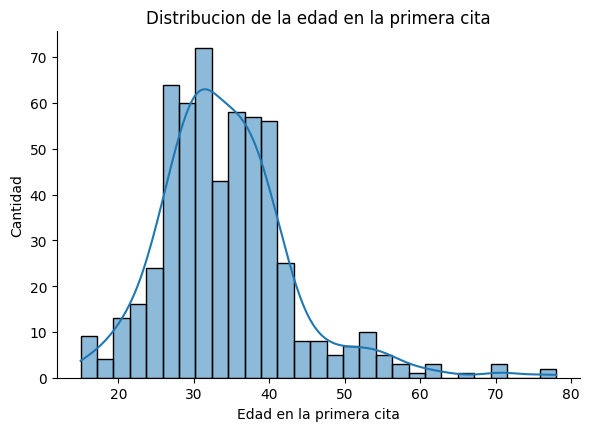

In [59]:
sns.displot(data=edad_firstdate_1, color="#001970",kde=True, rug=False, legend=False, height=4, aspect=1.5)
plt.xlabel('Edad en la primera cita')
plt.ylabel('Cantidad')
plt.title('Distribucion de la edad en la primera cita')
plt.savefig('Distribucion de la edad en la primera cita.png')

In [60]:
# sns.distplot( a=edad_firstdate_1["Edad_primera_vez"], hist=True, kde=True, rug=False, color='darkblue', hist_kws={'edgecolor':'black'});
# plt.xlabel('Edad en la primera cita')
# plt.ylabel('Cantidad')
# plt.title('Distribucion de la edad en la primera cita')
# plt.savefig('Distribucion de la edad en la primera cita.png')

C:\Users\Rafael Ortega\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """


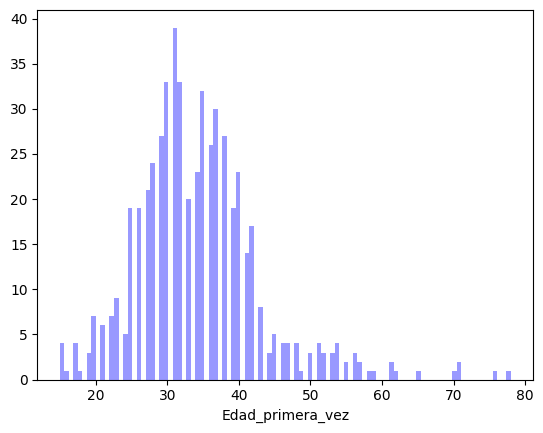

In [61]:
sns.distplot(edad_firstdate_1["Edad_primera_vez"],
             hist=True,
             kde=False,
             color='b',
             bins=100);

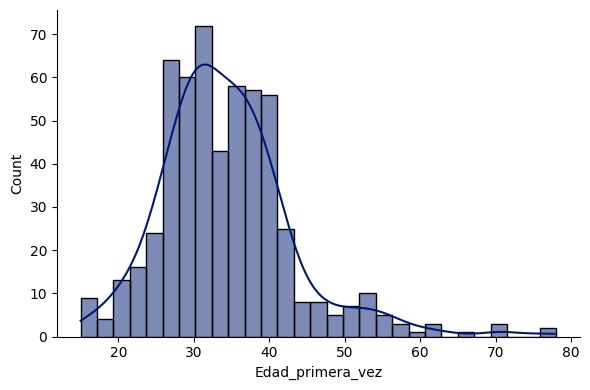

In [62]:
sns.displot(edad_firstdate_1["Edad_primera_vez"],color='#001970',kde=True, rug=False, legend=False, height=4, aspect=1.5)

**¿En que localidad residen las pacientes?**

In [63]:
# Siguiente paso, ver distribucion por localidades. 

localidades = pd.DataFrame(pacientes_processed['Localidad'])
localidades.describe()

,Localidad
count,721
unique,55
top,Rafaela
freq,532


In [64]:
localidades.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 905 entries, 1 to 909
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Localidad  721 non-null    object
dtypes: object(1)
memory usage: 14.1+ KB


In [65]:
localidades = localidades.dropna()
localidades

,Localidad
1,Rafaela
2,Rafaela
3,Ataliva
4,Rafaela
5,Rafaela
...,...
895,Rafaela
897,Susana
898,San Vicente
901,Rafaela


In [66]:
localidades.value_counts()

Localidad        
Rafaela              532
Sunchales             43
rafaela               18
Susana                18
Bella Italia          10
Sa Pereira             8
Pilar                  8
Santa Fe               6
Ceres                  5
Esperanza              5
Lehmann                4
San Guillermo          4
San Vicente            4
Ramona                 4
RAFAELA                3
Angelica               3
San Cristobal          3
Tostado                2
Suardi                 2
Arrufó                 2
Ataliva                2
Moises Ville           2
San Vicente            1
San Francisco          1
Vila                   1
San Justo              1
San Francisco          1
San vicente            1
Venado Tuerto          1
sa pereira             1
Sarmiento              1
Sastre                 1
Villa Trinidad         1
san Cristobal          1
Albacete               1
San Carlos Centro      1
Sa Pereira             1
Carlos Pelegrini       1
Colonia Aldao          1
Egusqui

In [67]:
# Me doy cuenta que los str estan escritos diferentes. Mayusculas, minusculas, etc

localidades['Localidad'] = localidades['Localidad'].apply(lambda x: x.lower() if isinstance(x, str) else x)
localidades['Localidad'] = localidades['Localidad'].apply(lambda x: x.title() if isinstance(x, str) else x)

# Elijo las 10 localidades mas frecuentes

localidades10 = localidades.value_counts().head(10)

In [68]:
localidades10 = pd.DataFrame(localidades10)

In [69]:
localidades10

,0
Localidad,
Rafaela,553
Sunchales,43
Susana,18
Bella Italia,10
Sa Pereira,9
Pilar,8
Santa Fe,6
Ceres,5
Esperanza,5


In [70]:
localidades10_1 = localidades10.reset_index()
type(localidades10_1)

pandas.core.frame.DataFrame

In [71]:
localidades10_1.head(11)

,Localidad,0
0,Rafaela,553
1,Sunchales,43
2,Susana,18
3,Bella Italia,10
4,Sa Pereira,9
5,Pilar,8
6,Santa Fe,6
7,Ceres,5
8,Esperanza,5
9,San Vicente,5


In [72]:
localidades10_1 = localidades10_1.rename(columns={0:'Frecuencia'})

In [73]:
localidades10_1.columns

Index(['Localidad', 'Frecuencia'], dtype='object')

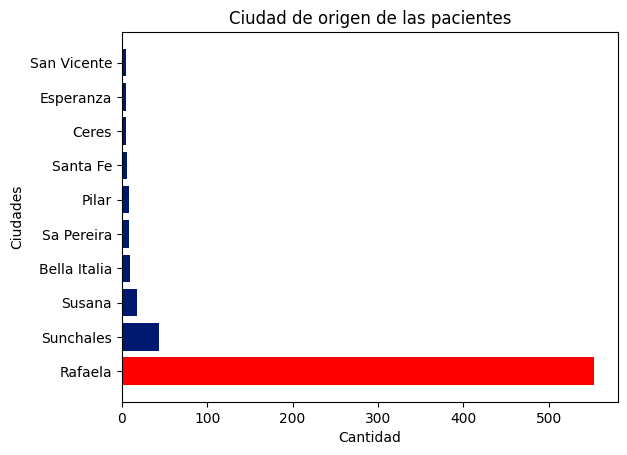

In [74]:
colores = ['red', '#001970', '#001970', '#001970', '#001970', '#001970', '#001970', '#001970', '#001970', '#001970']
plt.barh(localidades10_1['Localidad'], localidades10_1['Frecuencia'], color=colores);
plt.xlabel('Cantidad')
plt.ylabel('Ciudades')
plt.title('Ciudad de origen de las pacientes')
plt.savefig('Distribucion por localidad de origen.png')

In [75]:
localidades10_1['Porcentaje'] = (localidades10_1['Frecuencia'] / localidades10_1['Frecuencia'].sum()) * 100
localidades10_1

,Localidad,Frecuencia,Porcentaje
0,Rafaela,553,83.534743
1,Sunchales,43,6.495468
2,Susana,18,2.719033
3,Bella Italia,10,1.510574
4,Sa Pereira,9,1.359517
5,Pilar,8,1.208459
6,Santa Fe,6,0.906344
7,Ceres,5,0.755287
8,Esperanza,5,0.755287
9,San Vicente,5,0.755287


**¿Cual es la distrubicion de cada aseguradora?**

In [76]:
# Vamos con las aseguradoras. 

seguros = pacientes_processed[['Aseguradora']]

In [77]:
seguros.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 905 entries, 1 to 909
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Aseguradora  846 non-null    object
dtypes: object(1)
memory usage: 14.1+ KB


In [78]:
seguros1 = seguros.dropna()

In [79]:
seguros1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 846 entries, 1 to 909
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Aseguradora  846 non-null    object
dtypes: object(1)
memory usage: 13.2+ KB


In [80]:
# Como la mayoria estan en mayusculas, homogeinizo los datos en mayusculas

seguros2 = seguros1['Aseguradora'].str.upper()

In [81]:
type(seguros2)  # esto me devuelve una Series

pandas.core.series.Series

In [82]:
seguros2.unique()

array(['OSECAC', 'CENTRO ASISTENCIAL', 'SANCOR', 'AMUR', 'OSPAC', 'OSPIL',
       'OSDE ', 'IAPOS', 'PARTICULAR', 'AVALIAN', 'OSPAT', 'PAMI',
       'OSPECON', 'SWISS MEDICAL', 'FUTBOLISTAS A. AGREMIADOS',
       'CAJA FORENSE', 'OSDE', 'OSPERSAAMS', 'FEDERADA SALUD',
       'ACA SALUD', 'PREVENCION SALUD', 'MEDIFE', 'PREVENCION SALUD A5',
       'GALENO', 'OPDEA', 'OSPRERA', 'CAJA DE INGENIEROS',
       'JERARQUICOS SALUD', 'CIENCIAS ECONOMICAS', 'SANTARIO SANTA FE ',
       'OMINT', 'OSPEDYC', 'OSPIM', 'LUZ Y FUERZA', 'ARTE DE CURAR',
       'OSSEG', 'SUTIAGA', 'OSECAC\n', 'OSPIP', 'OSUTGRA', 'OSTCARA',
       'OSPSA', 'OSUTHGRA', 'UNL', 'DASUTEN'], dtype=object)

In [83]:
seguros2.value_counts()

IAPOS                        152
PREVENCION SALUD             115
SANCOR                       102
OSDE                          71
CENTRO ASISTENCIAL            67
PARTICULAR                    64
AMUR                          62
SWISS MEDICAL                 33
OSPAC                         19
MEDIFE                        13
OSPRERA                       12
JERARQUICOS SALUD             12
OSPAT                         11
OSPIL                         11
CAJA FORENSE                  10
FEDERADA SALUD                10
OSPECON                        9
AVALIAN                        9
OPDEA                          9
CAJA DE INGENIEROS             5
OSPEDYC                        5
OSECAC                         4
SUTIAGA                        4
FUTBOLISTAS A. AGREMIADOS      4
PAMI                           4
GALENO                         3
OSSEG                          3
CIENCIAS ECONOMICAS            3
OSUTHGRA                       3
OSPSA                          2
OSTCARA   

In [84]:
seguros2.describe()

count       846
unique       45
top       IAPOS
freq        152
Name: Aseguradora, dtype: object

In [85]:
seguros2.isna().sum()

0

In [86]:
# veo algunos datos mal tipeados, tengo que corregirlos. 

seguros3 = seguros2.replace('OSECAC\n', 'OSECAC')

In [87]:
seguros4 = seguros3.replace('PREVENCION SALUD A5', 'PREVENCION SALUD')

In [88]:
seguros5 = seguros4.str.rstrip()  # Elimino los espacios al final de la cadena

In [89]:
seguros5.value_counts()

IAPOS                        152
PREVENCION SALUD             116
SANCOR                       102
OSDE                          72
CENTRO ASISTENCIAL            67
PARTICULAR                    64
AMUR                          62
SWISS MEDICAL                 33
OSPAC                         19
MEDIFE                        13
JERARQUICOS SALUD             12
OSPRERA                       12
OSPIL                         11
OSPAT                         11
CAJA FORENSE                  10
FEDERADA SALUD                10
AVALIAN                        9
OSPECON                        9
OPDEA                          9
CAJA DE INGENIEROS             5
OSECAC                         5
OSPEDYC                        5
SUTIAGA                        4
FUTBOLISTAS A. AGREMIADOS      4
PAMI                           4
OSUTHGRA                       3
OSSEG                          3
GALENO                         3
CIENCIAS ECONOMICAS            3
OSPSA                          2
OMINT     

In [90]:
# Muchas categorias tienen n bajo, y no me sirven para graficar. Podria eliminar los indices que tengan menos de 5 repeticiones, o hacer un top 20.
# Entonces me conviene manejarme con una serie de frecuencias, adonde la aseguradora sea el index.

seguros6 = seguros5.value_counts()

In [91]:
seguros6.describe()

count     42.000000
mean      20.142857
std       35.027217
min        1.000000
25%        1.000000
50%        5.000000
75%       12.000000
max      152.000000
Name: Aseguradora, dtype: float64

In [92]:
seguros_top20 = seguros6.nlargest(20).index

In [93]:
len(seguros_top20)

20

In [94]:
mask_seguros = seguros_top20

In [95]:
seguros_top20_data = seguros6[mask_seguros]

In [96]:
seg_top20_data_1 = seguros_top20_data.reset_index()


In [97]:
seg_top20_data_2 = seg_top20_data_1.rename(columns={'Aseguradora':'Frecuencia', 'index':'Aseguradora'})
seg_3 = seg_top20_data_2.sort_values('Frecuencia', ascending=True)

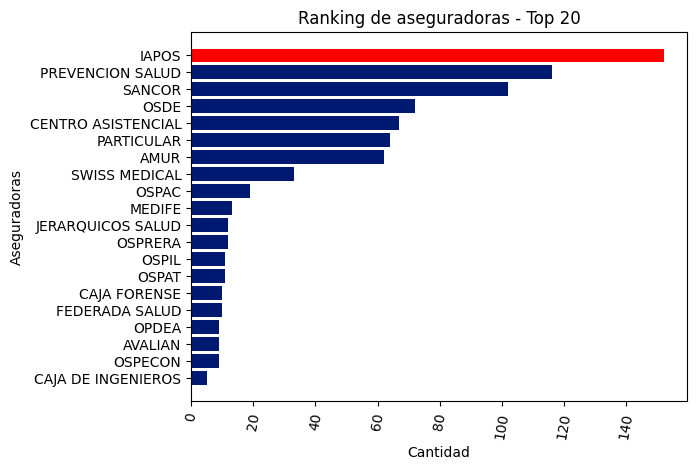

In [98]:

colores = ['#001970', '#001970', '#001970', '#001970', '#001970', '#001970', '#001970', '#001970', '#001970', '#001970', '#001970', '#001970', '#001970', '#001970','#001970', '#001970', '#001970', '#001970', '#001970','red']
plt.barh(seg_3['Aseguradora'], seg_3['Frecuencia'], color=colores);
plt.xlabel('Cantidad')
plt.ylabel('Aseguradoras')
plt.title('Ranking de aseguradoras - Top 20')
plt.savefig('Distribucion por aseguradora.png')
plt.xticks(rotation=80, fontsize=10);

In [99]:
seg_3['Porcentaje'] = (seg_3['Frecuencia'] / seg_3['Frecuencia'].sum()) * 100
seg_3

,Aseguradora,Frecuencia,Porcentaje
19,CAJA DE INGENIEROS,5,0.626566
17,OSPECON,9,1.127820
16,AVALIAN,9,1.127820
18,OPDEA,9,1.127820
15,FEDERADA SALUD,10,1.253133
14,CAJA FORENSE,10,1.253133
13,OSPAT,11,1.378446
12,OSPIL,11,1.378446
11,OSPRERA,12,1.503759
10,JERARQUICOS SALUD,12,1.503759


**¿Cuales son las aseguradoras que reunen el 80% del volumen?**

In [100]:
seguros7 = dict(seguros6)
type(seguros7)

dict

In [101]:
len(seguros6)

42

In [102]:
total_frec = seguros6.sum()
total_frec

846

In [103]:
porcentaje_acumulado = 0
listado_seguros_80 = []
cien_por_cien = seguros6.sum()


for seguro, frecuencia in seguros7.items():
    porcentaje = (frecuencia * 100) / total_frec
    porcentaje_acumulado += porcentaje
    listado_seguros_80.append(seguro)
    if porcentaje_acumulado >= 80:
        break
print(porcentaje_acumulado)
print(listado_seguros_80)


    

81.20567375886525
['IAPOS', 'PREVENCION SALUD', 'SANCOR', 'OSDE', 'CENTRO ASISTENCIAL', 'PARTICULAR', 'AMUR', 'SWISS MEDICAL', 'OSPAC']


In [104]:
seguros80percent = seguros_top20_data[listado_seguros_80]

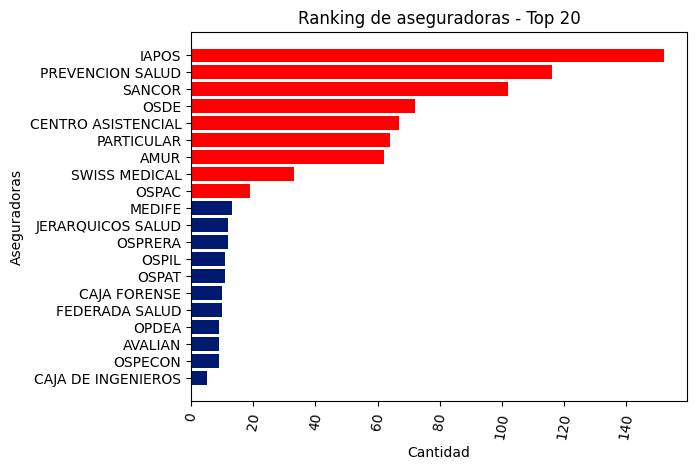

In [105]:
colores = ['#001970', '#001970', '#001970', '#001970', '#001970', '#001970', '#001970', '#001970', '#001970', '#001970', '#001970','red','red', 'red','red', 'red', 'red', 'red', 'red','red']
plt.barh(seg_3['Aseguradora'], seg_3['Frecuencia'], color=colores);
plt.xlabel('Cantidad')
plt.ylabel('Aseguradoras')
plt.title('Ranking de aseguradoras - Top 20')
plt.savefig('Distribucion por aseguradora.png')
plt.xticks(rotation=80, fontsize=10);

**¿Cuantas nuevas hay por un periodo mensual/anual?**

In [106]:
pacientes_processed.head()

,Apellido,DNI,Edad,fecha_creacion,Fecha Nacimiento,ID Paciente,Localidad,Nombres,Aseguradora
1,Zurbriggen,14338475.0,61,NaT,1961-06-16,2,Rafaela,María Cristina,OSECAC
2,Zoratti,17008004.0,58,NaT,1964-07-24,3,Rafaela,Graciela,CENTRO ASISTENCIAL
3,Trossero,29215013.0,NaN,NaT,NaT,4,Ataliva,Daniela Laura,CENTRO ASISTENCIAL
4,Ingaramo,6480084.0,81,NaT,1941-06-13,5,Rafaela,Alcira,SANCOR
5,Condrac,29054123.0,40,NaT,1980-04-24,6,Rafaela,Keila,AMUR


In [107]:
# Solo tengo que trabajar con la columna "fecha_creacion"

primer_registro = pacientes_processed[['fecha_creacion']]
type(primer_registro)

pandas.core.frame.DataFrame

In [108]:
primer_registro.columns

Index(['fecha_creacion'], dtype='object')

In [109]:
primer_registro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 905 entries, 1 to 909
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   fecha_creacion  723 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 14.1 KB


In [110]:
primer_registro1 = primer_registro.dropna()

In [111]:
primer_registro1['Año'] = primer_registro1['fecha_creacion'].dt.year
primer_registro1['Mes'] = primer_registro1['fecha_creacion'].dt.month

C:\Users\Rafael Ortega\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Rafael Ortega\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [112]:
primer_registro1

,fecha_creacion,Año,Mes
185,2015-09-17,2015,9
186,2015-09-24,2015,9
187,2015-10-05,2015,10
188,2015-10-23,2015,10
189,2015-10-23,2015,10
...,...,...,...
905,2023-04-03,2023,4
906,2023-04-04,2023,4
907,2023-04-04,2023,4
908,2023-04-11,2023,4


In [113]:
mask1 = primer_registro1['Año'] != 2023
primer_registro2 = primer_registro1[mask1]

In [114]:
primer_registro2.rename(columns={'fecha_creacion':'Cantidad pacientes nuevas'}, inplace=True)
primer_registro2.tail()

c:\Users\Rafael Ortega\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Cantidad pacientes nuevas,Año,Mes
871,2022-12-19,2022,12
872,2022-12-19,2022,12
873,2022-12-20,2022,12
874,2022-12-20,2022,12
875,2022-12-26,2022,12


In [115]:
by_month_year = primer_registro2.groupby(['Año','Mes'])
by_month_year

In [116]:
by_month_year.describe()

c:\Users\Rafael Ortega\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\groupby\groupby.py:1973: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  result = self.apply(lambda x: x.describe(**kwargs))


Cantidad pacientes nuevas                                    \
                             count unique        top freq      first   
Año  Mes                                                               
2015 9                           2      2 2015-09-17    1 2015-09-17   
     10                          5      3 2015-10-23    2 2015-10-05   
     11                          7      5 2015-11-09    2 2015-11-09   
     12                          8      5 2015-12-03    3 2015-12-01   
2016 1                           4      4 2016-01-11    1 2016-01-11   
...                            ...    ...        ...  ...        ...   
2022 8                           5      3 2022-08-24    2 2022-08-04   
     9                           8      6 2022-09-27    3 2022-09-07   
     10                         12      8 2022-10-03    2 2022-10-03   
     11                          7      5 2022-11-07    2 2022-11-01   
     12                          6      4 2022-12-19    2 2022-12-05   

                     
               last  
Año  Mes             
2015 9   2015-09-24  
     10  2015-10-31  
     11  2015-11-26  
     12  2015-12-29  
2016 1   2016-01-25  
...             ...  
2022 8   2022-08-31  
     9   2022-09-28  
     10  2022-10-27  
     11  2022-11-24  
     12  2022-12-26  

[84 rows x 6 columns]

In [117]:
by_month_year.count()

Cantidad pacientes nuevas
Año  Mes                           
2015 9                            2
     10                           5
     11                           7
     12                           8
2016 1                            4
...                             ...
2022 8                            5
     9                            8
     10                          12
     11                           7
     12                           6

[84 rows x 1 columns]

In [118]:
new_month_year = by_month_year.count()

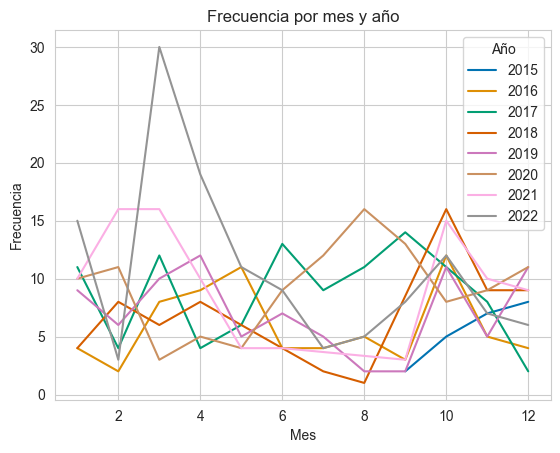

In [119]:
sns.set_style("whitegrid")
sns.set_palette("colorblind")

sns.lineplot(data=new_month_year, x='Mes', y='Cantidad pacientes nuevas', hue='Año', palette='colorblind')
plt.xlabel('Mes')
plt.ylabel('Frecuencia')
plt.title('Frecuencia por mes y año')

plt.show()


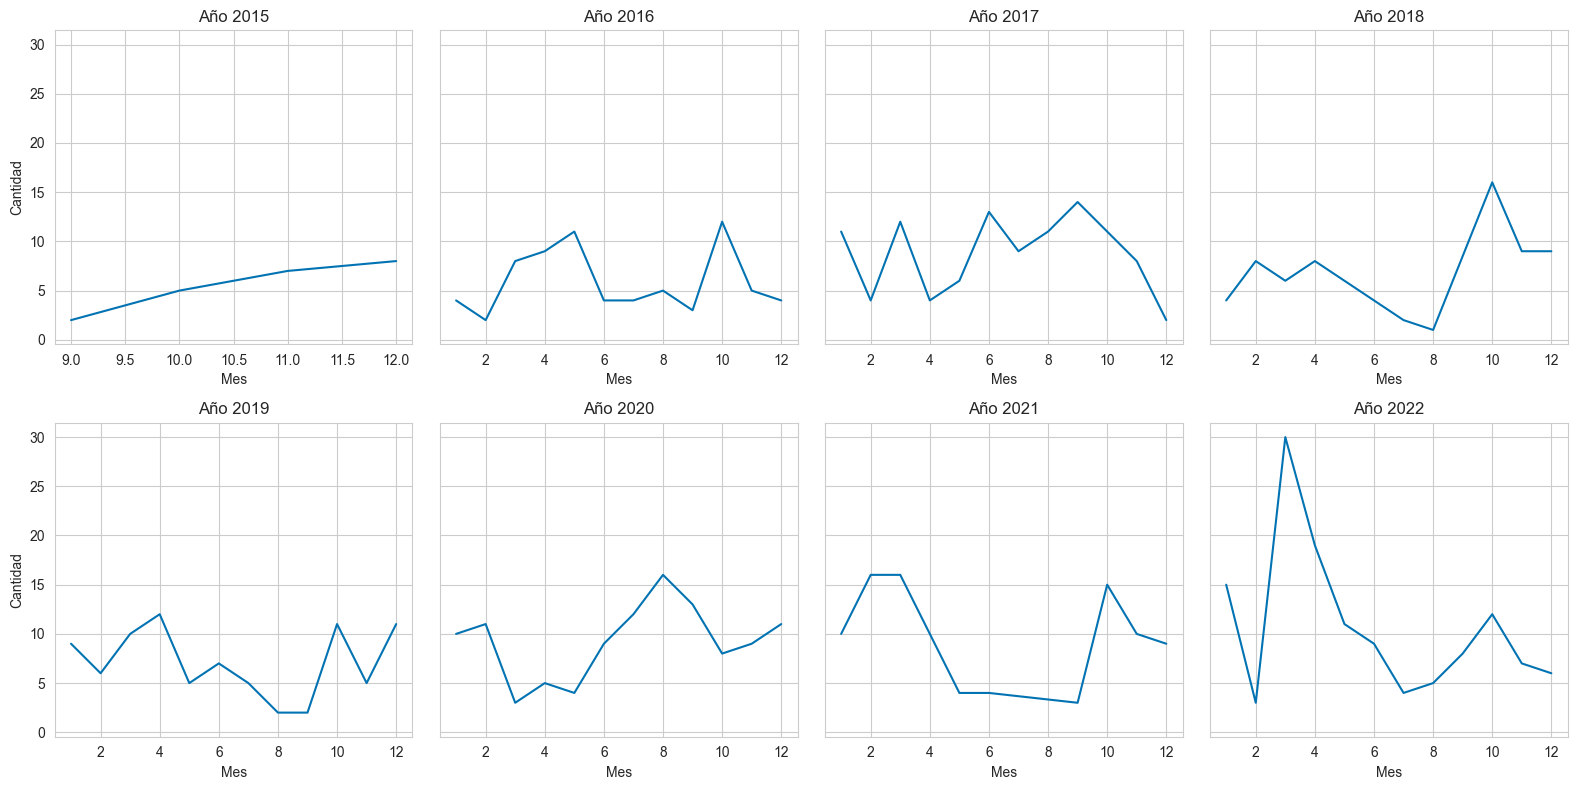

In [120]:
fig, axs = plt.subplots(2, 4, figsize=(16, 8), sharey=True)

for year, ax in zip(new_month_year.index.get_level_values('Año').unique(), axs.flatten()):
    sns.lineplot(data=new_month_year.loc[new_month_year.index.get_level_values('Año') == year], x='Mes', y='Cantidad pacientes nuevas', ax=ax)
    ax.set_title(f'Año {year}')
    ax.set_xlabel('Mes')
    ax.set_ylabel('Cantidad')

fig.tight_layout()
plt.show()


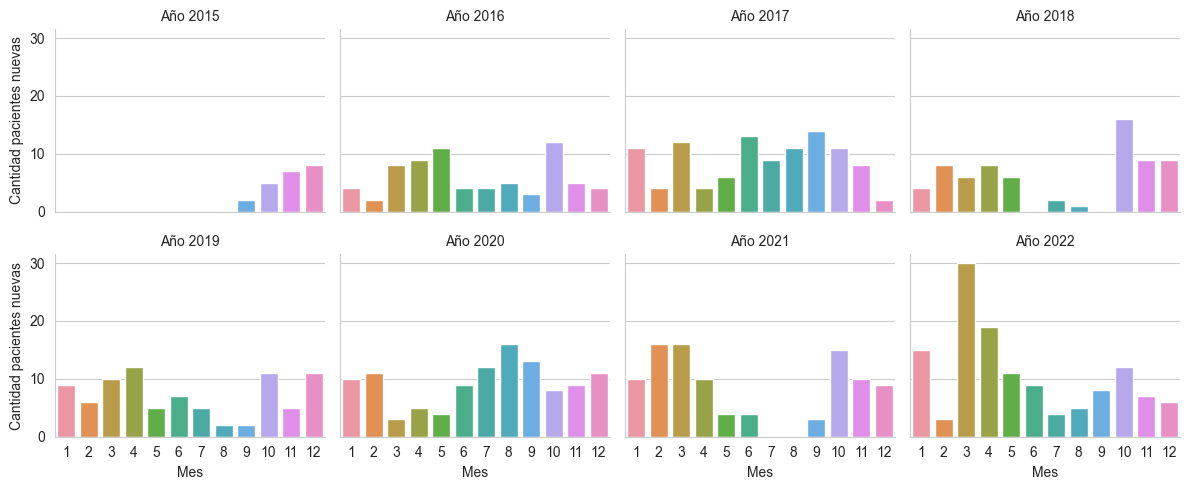

In [121]:
g = sns.catplot(data=new_month_year.reset_index(), x='Mes', y='Cantidad pacientes nuevas', col='Año', kind='bar', col_wrap=4, height=2.5, aspect=1.2)

g.set_titles('Año {col_name}')
plt.show()


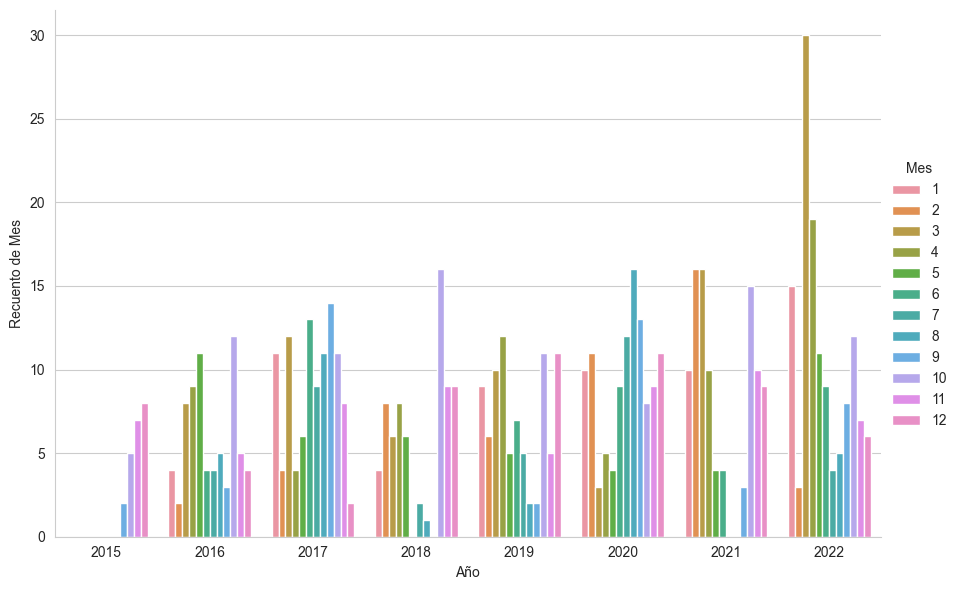

In [122]:
sns.catplot(data=new_month_year.reset_index(), x='Año', y='Cantidad pacientes nuevas', hue='Mes', kind='bar', height=6, aspect=1.5)

plt.xlabel('Año')
plt.ylabel('Recuento de Mes')
plt.show()


In [123]:
by_year = primer_registro2.groupby(['Año'])
by_year.count()

,Cantidad pacientes nuevas,Mes
Año,,
2015,22,22
2016,71,71
2017,105,105
2018,69,69
2019,85,85
2020,111,111
2021,97,97
2022,129,129


In [124]:
primer_registro1

,fecha_creacion,Año,Mes
185,2015-09-17,2015,9
186,2015-09-24,2015,9
187,2015-10-05,2015,10
188,2015-10-23,2015,10
189,2015-10-23,2015,10
...,...,...,...
905,2023-04-03,2023,4
906,2023-04-04,2023,4
907,2023-04-04,2023,4
908,2023-04-11,2023,4


In [125]:
groupby_year = primer_registro1.groupby('Año').count()

In [126]:
reducido = groupby_year.loc['2016':'2022']

In [127]:
reducido['fecha_creacion'].mean()

95.28571428571429

In [128]:
reducido

,fecha_creacion,Mes
Año,,
2016,71,71
2017,105,105
2018,69,69
2019,85,85
2020,111,111
2021,97,97
2022,129,129


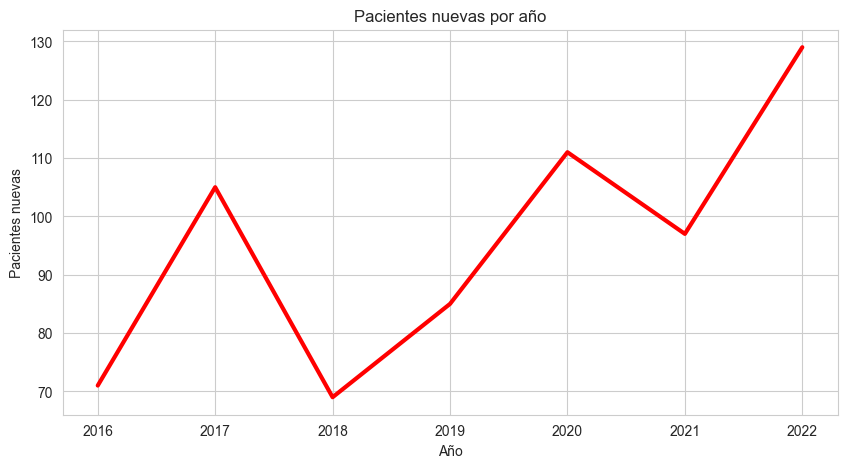

In [129]:
plt.figure(figsize=(10,5))
sns.lineplot(data=reducido,
             x="Año",
             y="fecha_creacion",
             linewidth = 3,
             color='red');
plt.xlabel('Año')
plt.ylabel('Pacientes nuevas')
plt.title("Pacientes nuevas por año")
plt.show()

In [137]:
edad_firstdate_1.head()

,Fecha Nacimiento,fecha_creacion,Edad_primera_vez,FN ginecologo,Edad ginecologo
185,1983-01-30,2015-09-17,32,1978-08-20,0
186,1985-05-15,2015-09-24,30,1978-08-20,0
187,1982-02-02,2015-10-05,33,1978-08-20,0
188,1981-05-20,2015-10-23,34,1978-08-20,0
189,1985-04-12,2015-10-23,30,1978-08-20,0


In [138]:
edad_firstdate_1['FN ginecologo'] = pd.to_datetime('20-08-1978')

C:\Users\Rafael Ortega\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [142]:
edad_firstdate_1['Edad ginecologo'] = ((edad_firstdate_1['fecha_creacion'] - edad_firstdate_1['FN ginecologo']).dt.days / 365).astype(int)

C:\Users\Rafael Ortega\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [143]:
edad_firstdate_1.head()

,Fecha Nacimiento,fecha_creacion,Edad_primera_vez,FN ginecologo,Edad ginecologo
185,1983-01-30,2015-09-17,32,1978-08-20,37
186,1985-05-15,2015-09-24,30,1978-08-20,37
187,1982-02-02,2015-10-05,33,1978-08-20,37
188,1981-05-20,2015-10-23,34,1978-08-20,37
189,1985-04-12,2015-10-23,30,1978-08-20,37


In [145]:
edad_firstdate_1['Año cita'] = edad_firstdate_1['fecha_creacion'].dt.year
edad_firstdate_1.head()

C:\Users\Rafael Ortega\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Fecha Nacimiento,fecha_creacion,Edad_primera_vez,FN ginecologo,Edad ginecologo,Año cita
185,1983-01-30,2015-09-17,32,1978-08-20,37,2015
186,1985-05-15,2015-09-24,30,1978-08-20,37,2015
187,1982-02-02,2015-10-05,33,1978-08-20,37,2015
188,1981-05-20,2015-10-23,34,1978-08-20,37,2015
189,1985-04-12,2015-10-23,30,1978-08-20,37,2015


In [149]:
edad_pac_gine = edad_firstdate_1.groupby('Año cita').mean().astype(int)
edad_pac_gine

,Edad_primera_vez,Edad ginecologo
Año cita,,
2015,34,37
2016,35,37
2017,33,38
2018,34,39
2019,34,40
2020,32,41
2021,34,42
2022,35,43
2023,37,44


In [155]:
edad_pac_gine['Diferencia'] = edad_pac_gine['Edad ginecologo'] - edad_pac_gine['Edad_primera_vez']
edad_pac_gine.head(10)

,Edad_primera_vez,Edad ginecologo,Diferencia
Año cita,,,
2015,34,37,3
2016,35,37,2
2017,33,38,5
2018,34,39,5
2019,34,40,6
2020,32,41,9
2021,34,42,8
2022,35,43,8
2023,37,44,7


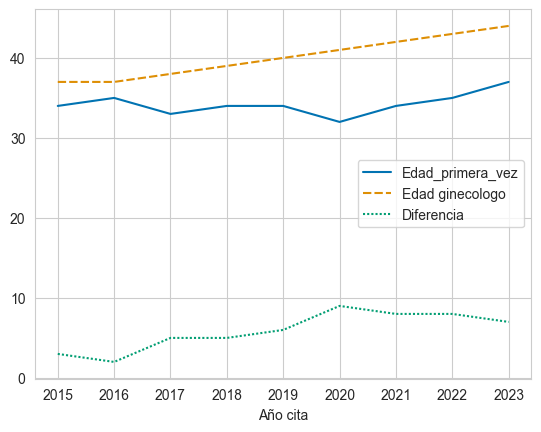

In [160]:
sns.lineplot(data=edad_pac_gine, errorbar=('ci',100));